In [2]:
import thinkplot
import thinkstats2
import pandas as pd
import numpy as np

We'll take a look at some measures of dispersion here - or how spread out is our data. 
Are all of our values closely grouped together, or are they spread all over the place?

We'll consider two sets of data here: the height of NBA players and the height of NFL players. 
Think about what we can know going in... hint: there's some really, really tall basketball players.

In [3]:
#Import the two datasets
dfNBA = pd.read_csv("NBA.csv")
dfNBA.head()

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384


In [4]:
#Import the two datasets
dfNFL = pd.read_csv("NFL.csv")
dfNFL.head()

,Age,Birth Place,Birthday,College,Current Status,Current Team,Experience,Height (inches),High School,High School Location,Name,Number,Player Id,Position,Weight (lbs),Years Played
0,NaN,"Grand Rapids , MI",5/23/1921,Notre Dame,Retired,NaN,3 Seasons,71.0,NaN,NaN,"Evans, Fred",NaN,fredevans/2513736,NaN,185.0,1946 - 1948
1,NaN,"Dayton , OH",12/21/1930,Dayton,Retired,NaN,1 Season,70.0,NaN,NaN,"Raiff, Jim",NaN,jimraiff/2523700,NaN,235.0,1954 - 1954
2,56.0,"Temple , TX",9/11/1960,Louisiana Tech,Retired,NaN,1 Season,74.0,NaN,NaN,"Fowler, Bobby",NaN,bobbyfowler/2514295,NaN,230.0,1985 - 1985
3,30.0,"New Orleans , LA",9/30/1986,LSU,Retired,NaN,5 Seasons,73.0,NaN,NaN,"Johnson, Quinn",NaN,quinnjohnson/79593,NaN,255.0,2009 - 2013
4,25.0,"Detroit , MI",3/31/1992,Central Michigan,Active,Pittsburgh Steelers,3rd season,77.0,Clintondale HS,"Clinton Twp.,Macomb Co., MI","Walton, L.T.",96.0,l.t.walton/2552444,DE,305.0,NaN


For now, we don't really care about anything but height, so we'll just make an array for each.
The dataframes are still there, you'll use them later.

In [9]:
#Take the height column
nba = np.array(dfNBA["Height"])
nfl = np.array(dfNFL["Height (inches)"])
#Dump the non-numbers
nba = nba[~np.isnan(nba)]
nfl = nfl[~np.isnan(nfl)]

In [11]:
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 73.50839891929989


Well that's not great. NBA players probably aren't 2.5 times taller than NFL players.
We need to correct between inches and cm.
We're metric people, so we'll make the NFLers into cm. 

In [12]:
#There are lots of ways to do this. It is called mapping a function, or applying a function to every value
#Because ours is very simple, this shortcut works.
#The syntax of doing this with more complex functions can get very confusing, so internet examples might be complex
nfl = nfl*2.54

Alright, try again...

In [15]:
print("NBA Mean Height: "+str(np.mean(nba)))
print("NFL Mean Height: "+str(np.mean(nfl)))

NBA Mean Height: 197.44075829383885
NFL Mean Height: 186.71133325502174


Use the cell below and determine the range of both the datasets. 

In [ ]:
#Determine ranges

The averages, shown in cm, are around 6'5" for the NBA, and 6'1" for the NFL
This makes some sense, NBA players are often really tall

We can picture the distribution of heights with some histograms...

In [19]:
nbahist = thinkstats2.Hist(nba, label='height')
nflhist = thinkstats2.Hist(nfl, label='height')

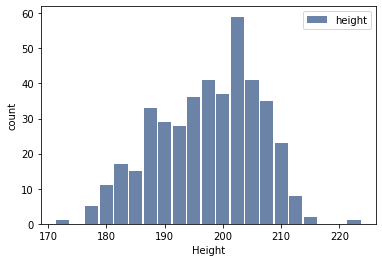

In [17]:
thinkplot.Hist(nbahist)
thinkplot.Config(xlabel='NBA Height', ylabel='count')

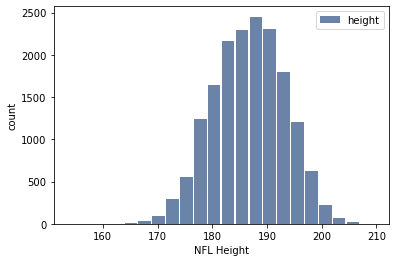

In [20]:
thinkplot.Hist(nflhist)
thinkplot.Config(xlabel='NFL Height', ylabel='count')

Now lets get down to business, which set of heights is more spread?
Does this jive with reality (if you're a sports fan)?

We can measure this, one measure is the Variance.

In [21]:
np.var(nba)

76.21094539655445

In [22]:
np.var(nfl)

42.8631249815054

Another measure of dispersion is the Standard Deviation - the square root of the Variance.

The standard deviation is normally used with normal distributions. If you remember all the z score stuff from high school, that comes from this. 

In [23]:
np.std(nba)

8.729888051776749

In [24]:
np.std(nfl)

6.546993583432429